<a href="https://colab.research.google.com/github/kubohenrique/credit_card/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*.

As fraudes de cartão de crédito representam um problema global, afetando milhões de pessoas anualmente. Essas fraudes ocorrem de várias formas, incluindo clonagem de cartão, phishing, roubo de identidade e fraudes online. Os problemas associados a essas fraudes são significativos, causando prejuízos financeiros tanto para os consumidores quanto para as instituições financeiras e comerciantes. Além disso, as vítimas muitas vezes enfrentam estresse emocional, tempo perdido na resolução de disputas e danos à sua reputação financeira. O impacto econômico é expressivo, com bilhões de dólares perdidos globalmente a cada ano devido a fraudes de cartão de crédito. Estima-se que dezenas de milhões de pessoas são afetadas por fraudes de cartão de crédito anualmente em todo o mundo, tornando-se uma preocupação significativa para a segurança financeira e a confiança nas transações eletrônicas.

<p align=center>
<img src="https://img.freepik.com/free-vector/hand-drawn-flat-design-ransomware-illustration_23-2149373424.jpg?t=st=1717173708~exp=1717177308~hmac=8d80e57816d283d5c182d2638a8ec4b4fccdde870d32f523c873e2769fcc9cae&w=1380" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

PCA (Principal Component Analysis), ou Análise de Componentes Principais, é uma técnica utilizada na análise de dados para simplificar a complexidade de conjuntos de dados grandes. Ela ajuda a identificar padrões e relações entre as variáveis.

Vamos simplificar: imagine que você tem um conjunto de dados com muitas características, como altura, peso, idade, renda, entre outras, sobre um grupo de pessoas. PCA vai tentar encontrar a "essência" desses dados, ou seja, vai tentar encontrar as características mais importantes que explicam a maior parte da variação nos dados.

Visualize isso como se fosse uma fotografia. Se você tem uma foto de um grupo de pessoas, pode notar que algumas pessoas estão mais próximas da câmera, outras estão em segundo plano. PCA tenta encontrar essas "direções" ou "eixos" onde a variação nos dados é maior, como se fossem as pessoas mais proeminentes na foto. Em seguida, ele projeta os dados nesses novos "eixos" para simplificar a análise.

Então, em resumo, PCA é como tirar uma foto grande e complicada e encontrar as partes mais importantes dela, para que possamos entender e trabalhar com os dados de forma mais fácil e eficiente.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

as únicas características que não foram transformadas com PCA são `Time` e `Amount`.

**Dicionáro de variáveis**

* `Time` : contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.
* `Amount` :  é o valor da transação, esta característica pode ser usada, por exemplo, para aprendizado sensível ao custo dependente do exemplo.
* `Class` : é a variável de resposta e assume o valor 1 em caso de fraude e 0 caso contrário.

### Importando as Bibliotecas

In [1]:
# @title instalando biliotecas

# Instalando as bibliotecas
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 M

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from ydata_profiling import ProfileReport
from pycaret.classification import *

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importando os dados de transação de cartão de crédito

In [3]:
df = pd.read_csv('https://github.com/kubohenrique/credit_card/raw/main/creditcard.csv')

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

<center><img alt="Colaboratory logo" width="50%" src="https://img.freepik.com/free-vector/data-analysis-concept-illustration_114360-8023.jpg?t=st=1715366832~exp=1715370432~hmac=f91a16bbf53976b01dda2352653bb8532cf3aab47875c9780a2f236b10550a5d&w=1380"></center>

A análise exploratória de dados (AED) desempenha um papel fundamental em qualquer projeto de análise de dados por várias razões:

1. **Compreensão dos dados:** A AED ajuda a entender a natureza dos dados com os quais estamos lidando. Isso inclui a identificação de tipos de variáveis, distribuições, valores ausentes e possíveis outliers.

2. **Detecção de padrões:** Ao visualizar e resumir os dados de diferentes maneiras, podemos identificar padrões, tendências e relações entre variáveis. Isso nos ajuda a formular hipóteses e orientar análises mais avançadas.

3. **Validação de pressupostos:** Antes de aplicar modelos estatísticos ou algoritmos de machine learning, é importante verificar se os pressupostos subjacentes são atendidos. A AED permite testar esses pressupostos e tomar medidas corretivas, se necessário.

4. **Identificação de outliers e erros:** A AED ajuda a identificar valores atípicos e erros nos dados que podem distorcer as análises posteriores. Isso é crucial para garantir a qualidade dos resultados finais.

5. **Seleção de variáveis:** Ao explorar os dados, podemos identificar quais variáveis são mais relevantes para nossos objetivos de análise. Isso nos permite focar em aspectos importantes e descartar informações irrelevantes.

6. **Comunicação de resultados:** Gráficos e resumos estatísticos gerados durante a AED são úteis para comunicar insights e resultados de forma clara e acessível a diferentes partes interessadas.

Em resumo, a análise exploratória de dados é uma etapa essencial em qualquer projeto de análise de dados, pois nos ajuda a compreender, validar e extrair informações valiosas dos dados, orientando análises mais avançadas e a tomada de decisões fundamentadas.


#### Verificando o tamanho do dataset:

In [4]:
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}')

Entradas:	284807
Variáveis:	31


#### Ver as 5 primeiras entradas

A função df.head() é frequentemente uma das primeiras etapas na análise de dados porque fornece uma visão rápida e sucinta dos dados no início do conjunto de dados. O df.head() é uma ferramenta útil para iniciar a análise de dados, fornecendo uma visão geral inicial dos dados e ajudando a identificar problemas potenciais antes de prosseguir com análises mais avançadas.
Então vamos ver quais são as 5 primeiras e ultimas linhas desses dados:

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Verificar se há valores ausentes

Identificar a presença de valores ausentes em cada coluna é uma etapa essencial na análise de dados, pois fornece insights importantes sobre a qualidade dos dados, impacto nas análises e orienta o tratamento adequado dos dados ausentes.

* Neste dataset em particular não temos nenhum valor ausente


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Tipos de Dados

Vamos verificar os tipos de dados encontrados nesse dataset com o método `.dtype`, o método `.dtypes` é crucial para entender os tipos de dados em cada coluna do DataFrame, orientando a seleção de métodos apropriados, identificação de problemas nos dados, planejamento da limpeza e comunicação de resultados.

* Todas as variáveis com exceção da variavel `class` são do tipo numérico e float.

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Verificando a variável Alvo `Class`

Como é [informado na descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as entradas relativas à transações fraudulentas correspondem a 0,17% do total.

O gráfico de barras mostra como essa discrepância se torna nítida e visível. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

Class
0    284315
1       492
Name: count, dtype: int64

A porcentagem de fraude é de 0.17%





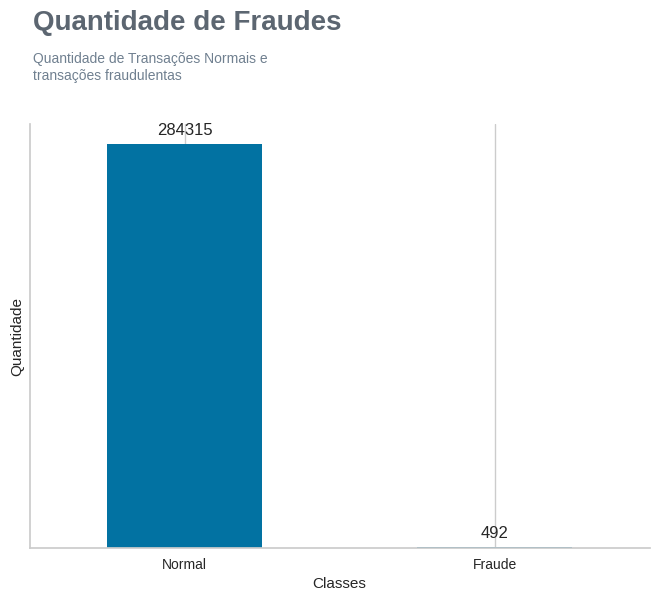

In [8]:
# Contando as quantidades de fraudes
print(df.Class.value_counts())

# Verificando a porcentagem de fraudes no dataset
print('\nA porcentagem de fraude é de {:.2f}%\n'.format((df[(df.Class == 1)].shape[0]/df.shape[0]) * 100))

# Gráfico de barra da variável Class
print('\n')

# Definindo a Figura
fig, ax = plt.subplots()

# Plotando o gráfico de barras
barplot = df.Class.value_counts().plot(kind='bar', ax=ax)

# Definindo os rótulos do eixo x
ax.set_xticklabels(['Normal', 'Fraude'], rotation=0)

# Definindo os rótulos dos eixo y e x
ax.set_ylabel('Quantidade')
ax.set_xlabel('Classes')

# remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando os valores acima das barras
for p in barplot.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# title
ax.text(-0.49, 365000,'Quantidade de Fraudes', fontsize=20, color= '#5c6671', fontweight='bold')
ax.text(-0.49, 330000,'Quantidade de Transações Normais e \ntransações fraudulentas', color= '#708090',fontsize=10)

plt.show()

### **Dados Desbalanceados**

Como informado na fonte dos dados, os casos de fraude representam aproximadamente apenas 0,17%, o que seria o esperado, pois é mais comum ter transações normais ao invez de fraudulentas, mas isso gera dados extremanete desbalanceados e acaba comprometendo o modelo de ML.

Dados desbalanceados são um problema significativo para modelos de aprendizado de máquina (ML) porque podem levar a modelos que têm um desempenho insatisfatório, especialmente em tarefas de classificação. Aqui estão algumas razões pelas quais dados desbalanceados são prejudiciais:

### 1. **Performance Desbalanceada**
- **Bias para a Classe Majoritária:** Em um conjunto de dados desbalanceado, o modelo tende a se concentrar na classe majoritária porque ela domina o conjunto de dados. Isso pode levar a um alto desempenho nas métricas gerais de acurácia, mas um desempenho muito ruim na detecção da classe minoritária.
  
  Por exemplo, se apenas 1% das transações são fraudulentas e o modelo simplesmente prever que todas as transações não são fraudulentas, ele ainda terá uma acurácia de 99%, mas não será útil para detectar fraudes.

### 2. **Métricas de Avaliação Enganosas**
- **Acurácia:** Em dados desbalanceados, a acurácia pode ser enganosa, pois não reflete bem o desempenho do modelo na classe minoritária.
- **Precisão e Recall:** As métricas como precisão (precision) e recall são mais informativas, mas também podem ser afetadas negativamente pelo desbalanceamento.

### 3. **Capacidade de Generalização**
- **Sub-representação da Classe Minoritária:** O modelo pode não aprender as características importantes da classe minoritária devido à falta de exemplos suficientes. Isso leva a uma baixa capacidade de generalização do modelo quando aplicado a novos dados.

### 4. **Problemas de Convergência em Algoritmos**
- **Algoritmos de Aprendizado:** Alguns algoritmos de aprendizado de máquina, como regressão logística e redes neurais, podem ter dificuldades para convergir ou podem convergir para soluções subótimas devido ao desbalanceamento dos dados.

### 5. **Decisões de Custo**
- **Impacto Financeiro e de Segurança:** Em problemas críticos como a detecção de fraude, a classe minoritária (fraude) é muitas vezes mais importante do que a classe majoritária. Detectar corretamente fraudes pode ter um impacto financeiro e de segurança significativo, e falhar em detectá-las pode ser muito custoso.

Ao lidar corretamente com dados desbalanceados, você pode desenvolver modelos que são mais precisos e úteis em detectar eventos raros e críticos, como fraudes em transações de cartão de crédito.

E para esse caso, usarei a biblioteca *pycaret* já para fazer o balanceamento e também para definir o modelo de Machine Learning.

## PyCaret e AutoML

Um projeto de Machine Learning é algo que carrega elevado nível de complexidade, e demanda muita concentração, atenção aos detalhes e principalmente, tempo. Precisamos saber muito bem como tratar nossos dados, escolher e treinar modelos, avaliar resultados, e tudo isso consome muito tempo, e acaba abrindo margem para erros.

Com isso em mente, utilizaremos aqui o framework de Auto Machine Learning **PyCaret**.

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais.


### Vazamento de dados
Vazamento de dados (Data Leakage) em projetos de aprendizado de máquina ocorre quando informações fora do conjunto de dados de treinamento são indevidamente incluídas no treinamento do modelo. Isso é problemático porque o modelo aprende padrões que não estarão disponíveis em situações reais, resultando em um desempenho irrealisticamente alto durante a validação e testes, mas falhando ao ser aplicado em novos dados.

Essa falha na generalização é uma das principais razões pelas quais o vazamento de dados é ruim. Modelos treinados com dados vazados tendem a ter uma falsa confiança em seu desempenho, levando a decisões erradas e potenciais prejuízos quando implantados em ambientes reais. Isso pode ocorrer, por exemplo, quando variáveis futuras são usadas no treinamento ou quando o pré-processamento é feito antes da divisão dos dados em conjuntos de treinamento e teste.

* Para prevenir vazamentos, é crucial dividir os dados antes de qualquer processamento, nesse caso separarei 10% dos dados para preservar. Assim, evitamos vazamentos de dados para desenvolver modelos que sejam verdadeiramente úteis e precisos em cenários do mundo real.

In [9]:
# separando os dados em teste e treino
test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

Feito isso, podemos verificar a integridade e tamanho dos conjuntos.

In [10]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(256326, 31)
(28481, 31)


### Fazendo o Setup

A função `setup()` inicializa o ambiente no PyCaret e cria o pipeline de transformação para preparar os dados para modelagem e deploy.


Após a importação, a função `setup()` deve ser chamada antes de qualquer outra função do PyCaret ser executada. Ela recebe dois parâmetros obrigatórios: Um dataframe do pandas e o nome da coluna alvo. Todos os outros parâmetros são opcionais, e são usados para customizar o pipeline de pré-processamento.

Ao executar o `setup()`, o PyCaret vai inferir automaticamente o tipo de cada variável baseado em algumas propriedades. Normalmente, a inferência é feita corretamente mas não é o caso todas as vezes. Por isso, o PyCaret oferece uma tabela mostrando as features e seus tipos inferidos, após a execução do `setup()`. Caso todos os tipos estejam corretos, podemos seguir em frente apertando a tecla enter. Caso contrário, deve-se digitar `quit` no espaço disponibilizado.

Garantir que os tipos de dados estejam corretos é fundamental para o PyCaret, pois ele executa automaticamente alguns pré-processamentos que são necessários para problemas de Machine Learning. Essas técnicas são executadas diferentemente para cada tipo de dados, por isso é essencial que sejam corretamente configurados.

* Para problemas de detecção de fraudes, usarei um modelo de classificação,  pois a detecção de fraudes é naturalmente adequada para modelos de classificação devido à sua capacidade de lidar com decisões binárias, identificar padrões complexos, usar métricas de avaliação apropriadas, oferecer flexibilidade na modelagem, ser implementada eficientemente em escala e fornecer interpretabilidade quando necessário.

* Durante a configuração, foi especificado o parâmetro `fix_imbalance=True` para tratar o desbalanceamento dos dados automaticamente.

In [11]:
clf1 = setup(data=train, target='Class', fix_imbalance=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(256326, 31)"
4,Transformed data shape,"(435122, 31)"
5,Transformed train set shape,"(358224, 31)"
6,Transformed test set shape,"(76898, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


### Treinar e comparar modelos

O PyCaret facilita a comparação de diferentes modelos. Vamos usar a função `compare_models()` para identificar os melhores modelos para nosso conjunto de dados.

Com os resultados, precisamos escolher uma métrica para podermos eleger o melhor modelo para esse problema.

**Métricas usadas para avaliar modelos de classificação:**

### 1. Acurácia (Accuracy)
- **Definição**: A acurácia é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
- **Interpretação**: É uma métrica básica que indica a precisão geral do modelo. No entanto, pode ser enganosa em conjuntos de dados desbalanceados, onde uma classe é muito mais comum do que a outra.

### 2. Área Sob a Curva ROC (ROC AUC)
- **Definição**: A Área Sob a Curva (ROC AUC) é uma medida da capacidade discriminativa do modelo. É calculada como a área sob a curva ROC (Receiver Operating Characteristic), que é um gráfico da taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) em vários limiares de classificação.
- **Interpretação**: Quanto maior a área sob a curva ROC, melhor o desempenho do modelo em discriminar entre as classes. Um valor de 0,5 indica um modelo que faz previsões aleatórias, enquanto um valor de 1 indica um modelo perfeito.

### 3. Revocação (Recall ou Sensibilidade)
- **Definição**: A revocação é a proporção de verdadeiros positivos (TP) em relação ao total de instâncias positivas no conjunto de dados.
- **Interpretação**: É uma métrica útil quando o custo de um falso negativo é alto. Por exemplo, na detecção de fraudes, é importante detectar o máximo possível de transações fraudulentas, mesmo que isso signifique ter alguns falsos positivos.

### 4. Precisão (Precision)
- **Definição**: A precisão é a proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas feitas pelo modelo.
- **Interpretação**: É uma métrica útil quando o custo de um falso positivo é alto. Por exemplo, na detecção de spam, é importante garantir que a maioria dos e-mails classificados como spam seja realmente spam.

### 5. F1-Score
- **Definição**: O F1-Score é a média harmônica entre precisão e revocação. É calculado como 2 * (precisão * revocação) / (precisão + revocação).
- **Interpretação**: O F1-Score fornece um equilíbrio entre precisão e revocação. É útil quando queremos uma métrica que leve em consideração tanto falsos positivos quanto falsos negativos.

### 6. Kappa e MCC (Matthews Correlation Coefficient)
- **Definição**: Kappa e MCC são métricas que medem a concordância entre as previsões do modelo e as verdadeiras classes.
- **Interpretação**: Eles levam em consideração o desempenho do modelo além do que seria esperado ao acaso. Valores próximos de 1 indicam um bom desempenho do modelo, enquanto valores próximos de 0 indicam desempenho ao acaso.

Essas são algumas das principais métricas usadas para avaliar modelos de classificação. É importante considerar o contexto específico do problema ao escolher as métricas apropriadas e interpretar seus resultados.

In [12]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,0.9710,0.8415,0.9088,0.8726,0.8724,0.8737,45.6660
rf,Random Forest Classifier,0.9995,0.9703,0.8320,0.8796,0.8535,0.8532,0.8544,344.0300
xgboost,Extreme Gradient Boosting,0.9995,0.9763,0.8479,0.8437,0.8446,0.8444,0.8449,8.4140
lightgbm,Light Gradient Boosting Machine,0.9993,0.9684,0.8480,0.7764,0.8094,0.8090,0.8104,18.5260
dummy,Dummy Classifier,0.9982,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6260
dt,Decision Tree Classifier,0.9977,0.8913,0.7845,0.4263,0.5512,0.5501,0.5766,39.6580
gbc,Gradient Boosting Classifier,0.9961,0.9708,0.8828,0.2987,0.4461,0.4446,0.5120,645.7760
nb,Naive Bayes,0.9929,0.9694,0.7815,0.1695,0.2785,0.2764,0.3619,1.0060
ada,Ada Boost Classifier,0.9913,0.9728,0.8701,0.1546,0.2622,0.2600,0.3643,130.4860
lr,Logistic Regression,0.9910,0.9792,0.9018,0.1576,0.2670,0.2648,0.3732,48.8820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Com duas simples palavras de código criamos 15 modelos, usando 5 folds de validação cruzada e avaliamos os modelos com base nas 6 métricas de avaliação mais utilizadas (Accuracy, AUC, Recall, Precision, F1, Kappa e MCC).

### Instanciando o Modelo

Apesar do `compare_models()` ser uma função poderosa, e normalmente um excelente ponto de partida, ela não retorna modelos treinados. O *workflow* recomendado pelo PyCaret é usar o compare_models logo após o setup para avaliar os modelos que performam melhor com o conjunto de dados e selecionar alguns candidatos para seguir experimentando.

Dessa forma, a função permite que você crie modelos a partir da função `create_model()`. Essa função cria o modelo e o avalia usando uma *stratified cross validation*. Assim como o compare_models, o output é uma tabela de pontuação que mostra Accuracy, AUC, Recall, Precision, F1, Kappa e MCC por fold.

Para a detecção de fraudes, a **RECALL** e o **F1-SCORE** são particularmente importantes porque:

* Recall garante que poucas fraudes passem despercebidas, o que é crucial em cenários onde a detecção de cada fraude tem grande importância.
* F1-Score equilibra a precisão e a revocação, proporcionando uma visão mais equilibrada do desempenho do modelo.

Partindo disso, o modelo que apresenta as melhores metricas para os dois, é o modelo de **Extra Trees Classifier**, porém irei comparar o o modelo de **Logistic Regression**, pois é o modelo que apresenta melhores números para a métrica de Recall, que privilegia os Falsos Positivos, o que é desejável num projeto de Detecção de Fraudes.


#### **Sobre o Extra Trees Classifier**
<p align="center"><img src="https://www.researchgate.net/profile/Wangda-Zuo-2/publication/364771403/figure/fig1/AS:11431281097117604@1668450027415/Structure-of-Extra-Trees-Kapoor-2020-Extra-Trees-constructs-the-set-of-decision-trees.png" width="60%"></p>

O **Extra Trees Classifier** (ou **Extremely Randomized Trees Classifier**) é um algoritmo de machine learning usado para tarefas de classificação. Ele faz parte da família dos métodos ensemble baseados em árvores de decisão e foi introduzido como uma variação do algoritmo de Random Forest. Aqui estão os principais aspectos do Extra Trees Classifier:

#### Características Principais

1. **Ensemble de Árvores**:
   - O Extra Trees Classifier cria uma coleção de árvores de decisão (ensemble) a partir do conjunto de dados de treinamento. Cada árvore é treinada usando uma amostra aleatória dos dados.

2. **Divisões Aleatórias**:
   - Ao contrário do Random Forest, onde a divisão dos nós é escolhida de acordo com a métrica de qualidade (como a redução de Gini ou a entropia), o Extra Trees Classifier seleciona os pontos de corte (thresholds) aleatoriamente para cada divisão (split).

3. **Redução de Variância**:
   - O uso de divisões aleatórias aumenta a variabilidade entre as árvores individuais, o que pode reduzir a variância do modelo final. Essa variabilidade adicional é útil para melhorar a generalização do modelo.

4. **Rapidez de Treinamento**:
   - Como as divisões são feitas aleatoriamente, o Extra Trees Classifier geralmente é mais rápido no treinamento comparado ao Random Forest, que busca ativamente o melhor ponto de corte.

#### Vantagens

- **Redução de Overfitting**: A aleatoriedade adicional ajuda a reduzir o overfitting, resultando em modelos que se generalizam melhor para dados não vistos.
- **Eficiência Computacional**: A escolha aleatória dos pontos de corte torna o treinamento mais rápido do que métodos que otimizam ativamente cada divisão.
- **Robustez**: O ensemble de múltiplas árvores torna o modelo robusto a outliers e variações nos dados.

#### Desvantagens

- **Menor Interpretabilidade**: Como em outros métodos de ensemble, a interpretabilidade do modelo final é menor comparada a uma única árvore de decisão.
- **Sensibilidade a Parâmetros**: O desempenho do Extra Trees Classifier pode ser sensível a escolhas de parâmetros como o número de árvores no ensemble e a profundidade máxima das árvores.

#### Conclusão

O Extra Trees Classifier é uma ferramenta poderosa para classificação, especialmente útil em conjuntos de dados grandes e complexos. Sua abordagem de aleatoriedade extrema nas divisões dos nós pode levar a modelos robustos e eficientes, com um treinamento mais rápido e uma boa capacidade de generalização.

In [13]:
# criar modelo Extra Tree
et = create_model('et', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9869,0.8413,0.9464,0.8908,0.8906,0.8921
1,0.9994,0.9791,0.8254,0.8525,0.8387,0.8384,0.8385
2,0.9997,0.9810,0.9219,0.9365,0.9291,0.9290,0.9290
3,0.9994,0.9459,0.7460,0.9216,0.8246,0.8243,0.8289
4,0.9996,0.9620,0.8730,0.8871,0.8800,0.8798,0.8798
Mean,0.9996,0.9710,0.8415,0.9088,0.8726,0.8724,0.8737
Std,0.0001,0.0150,0.0580,0.0346,0.0375,0.0376,0.0366


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
# criar modelo Logistic Regression
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9940,0.9939,0.8889,0.2105,0.3404,0.3385,0.4310
1,0.9916,0.9791,0.9206,0.1629,0.2768,0.2747,0.3854
2,0.9879,0.9808,0.9219,0.1204,0.2130,0.2105,0.3308
3,0.9910,0.9708,0.8730,0.1486,0.2540,0.2518,0.3581
4,0.9905,0.9714,0.9048,0.1454,0.2505,0.2483,0.3606
Mean,0.9910,0.9792,0.9018,0.1576,0.2670,0.2648,0.3732
Std,0.0020,0.0084,0.0188,0.0298,0.0421,0.0423,0.0337


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Repare que a média apresentada aqui é a mesma que vimos no `compare_models()` anteriormente. Isso porque o modelo é criado e avaliado da mesma forma que fizemos anteriormente.


### Tuning do Modelo

O **tuning** de hiperparâmetros é uma etapa crítica no desenvolvimento de modelos de machine learning. Consiste em ajustar os parâmetros do modelo para otimizar seu desempenho. Aqui estão os principais motivos pelos quais o tuning é tão importante:

### 1. Melhoria de Desempenho
- **Precisão Aumentada**: Parâmetros bem ajustados podem melhorar significativamente a precisão do modelo, tornando-o mais eficaz na tarefa de classificação ou regressão.
- **Generalização**: Um bom ajuste de parâmetros pode ajudar o modelo a generalizar melhor para novos dados, evitando overfitting (quando o modelo se ajusta demais aos dados de treinamento) e underfitting (quando o modelo é muito simples para capturar a complexidade dos dados).

### 2. Redução de Overfitting e Underfitting
- **Equilíbrio**: Tuning ajuda a encontrar um equilíbrio entre a complexidade do modelo e a quantidade de dados disponíveis, reduzindo a probabilidade de overfitting e underfitting.

### 3. Eficiência Computacional
- **Tempo de Treinamento**: Parâmetros bem ajustados podem resultar em modelos que treinam mais rapidamente e são mais eficientes em termos de uso de recursos computacionais.
- **Predição Rápida**: Modelos otimizados podem realizar previsões mais rapidamente, o que é crucial para aplicações em tempo real.

### 4. Melhoria na Interpretação
- **Simplicidade do Modelo**: Ajustar hiperparâmetros pode resultar em modelos mais simples e interpretáveis, o que é importante em muitas aplicações práticas.

### 5. Aplicação Prática
- **Desempenho em Produção**: Modelos bem ajustados têm um desempenho mais consistente e confiável em ambientes de produção, onde os dados podem variar em relação aos dados de treinamento.

Quando um modelo é criado usando o create_model() ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função `tune_model()`.

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez o avalia com validação cruzada. O output é uma tabela de scores para Accuracy, AUC, Recall, Precision, F1, Kappa e MCC por fold.

Para este projeto, não irei realizar o tunning, por limitação de hardware, mas deixarei o código para que futuramente eu possa rodar com o tunning.

In [18]:
# tunando modelo
#tuned_et = tune_model(et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:26:25
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


KeyboardInterrupt: 

### Plotando Modelos

Antes de finalizar e salvar o modelo, nós podemos usar a função `plot_model()` para plotar visualizações sobre a performance do nosso modelo

Essa função recebe o modelo treinado como input e retorna um plot baseado no desempenho com o pedaço do conjunto de dados separado para teste.

O PyCaret fornece várias funções de visualização que facilitam a análise e interpretação dos resultados dos modelos.

Usando o PyCaret, você pode facilmente treinar modelos, compará-los e visualizar uma variedade de gráficos para entender o desempenho e as características dos seus modelos de detecção de fraude. As funções de visualização fornecidas pelo PyCaret são intuitivas e ajudam a identificar pontos fortes e fracos dos modelos treinados.

#### Funções de Visualização

1. **Confusion Matrix**:
   - Mostra a matriz de confusão para avaliar a precisão do modelo.

2. **ROC Curve**:
   - Plota a curva ROC para visualizar a performance do modelo em termos de taxa de verdadeiros positivos versus taxa de falsos positivos.

3. **Precision-Recall Curve**:
   - Plota a curva de precisão-revocação, que é útil em conjuntos de dados desbalanceados.

4. **Feature Importance**:
   - Plota a importância das features para entender quais variáveis são mais influentes no modelo.

5. **Learning Curve**:
   - Plota a curva de aprendizado para visualizar o desempenho do modelo em relação ao tamanho do conjunto de dados.

6. **Calibration Curve**:
   - Plota a curva de calibração para avaliar a precisão das probabilidades preditas pelo modelo.

7. **Validation Curve**:
   - Plota a curva de validação para entender como a mudança de hiperparâmetros afeta o desempenho do modelo.



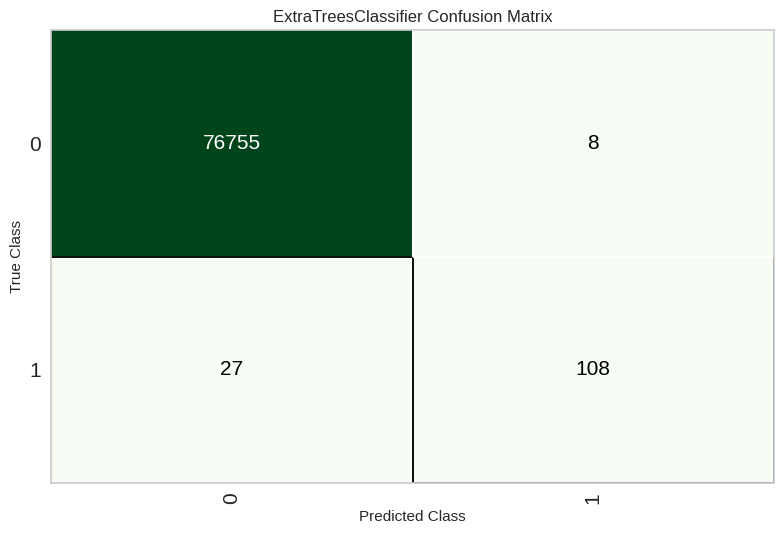

In [19]:
# Plotar a matriz de confusão #tuned_et
plot_model(et, plot='confusion_matrix')

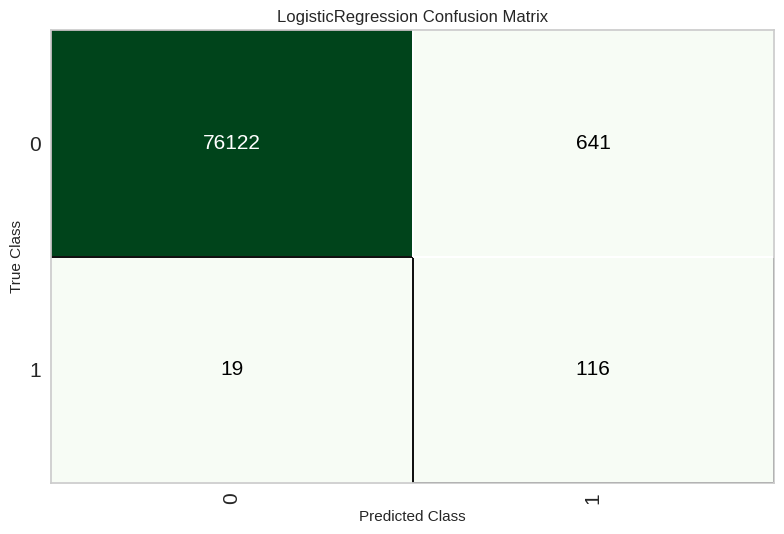

In [32]:
# Plotar a matriz de confusão LR
plot_model(lr, plot='confusion_matrix')

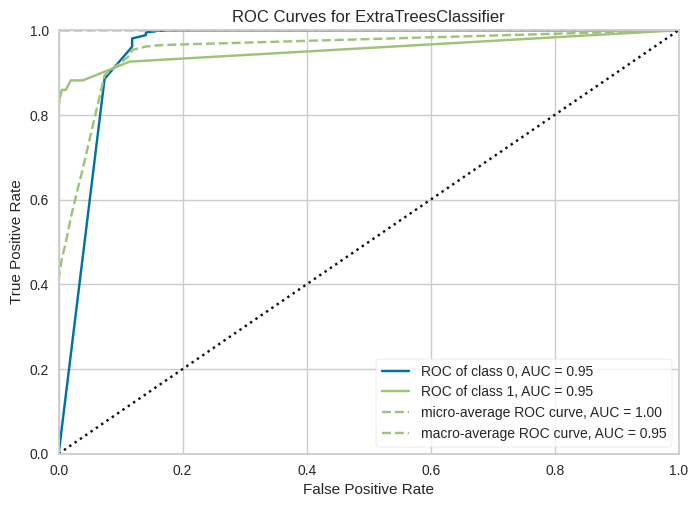

In [20]:
# Plotar a curva ROC
plot_model(et, plot='auc')

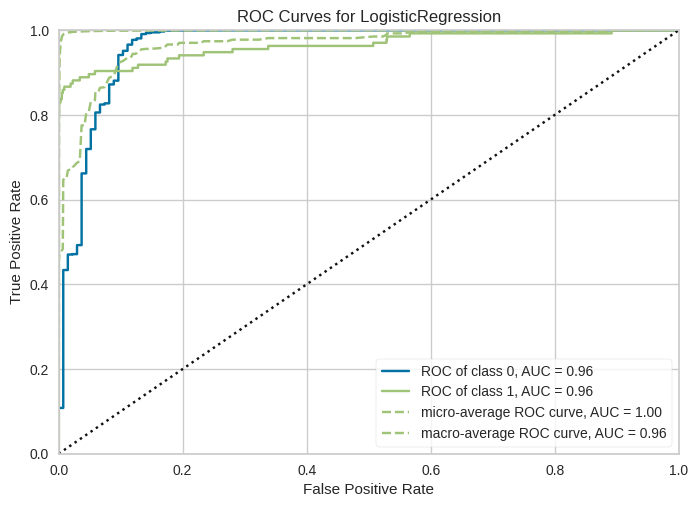

In [33]:
# Plotar a curva ROC (Lr)
plot_model(lr, plot='auc')

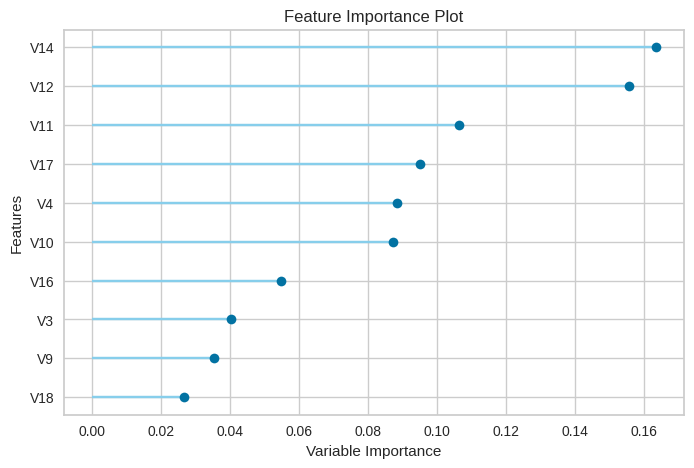

In [22]:
# Plotar a importância das features
plot_model(et, plot='feature')

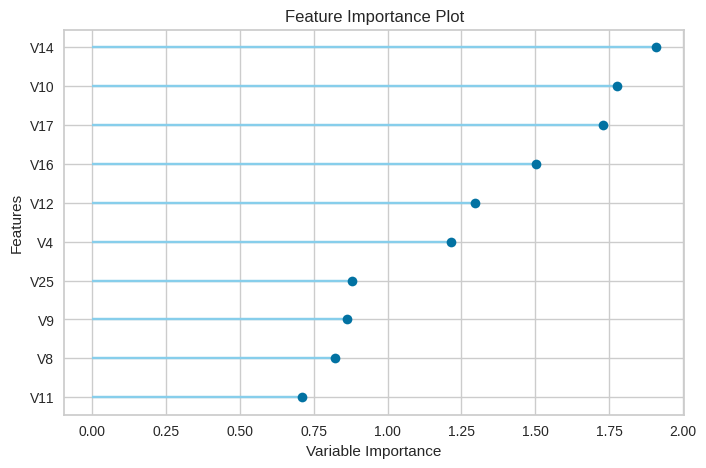

In [34]:
# Plotar a importância das features (Lr)
plot_model(lr, plot='feature')

### Fazendo Previsões

Antes de finalizar o modelo, é recomendável que se faça uma checagem final, fazendo previsões no conjunto de teste e revisando as métricas de avaliação.

O objetivo aqui é verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [24]:
# fazer previsões (Et)
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9995,0.9549,0.8000,0.9310,0.8606,0.8603,0.8628


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
6301,9087.0,1.287385,0.159413,0.413365,0.890239,-0.074789,-0.051064,-0.181301,-0.179215,1.827203,...,-0.191023,-0.418375,0.704620,0.448303,-0.038068,-0.002023,6.990000,0,0,1.00
111823,77242.0,1.205305,-0.248254,0.779616,0.515946,-0.752591,-0.159095,-0.419113,-0.070780,-1.160276,...,0.177043,0.034963,0.146145,-0.585196,0.080864,0.045822,42.000000,0,0,1.00
53131,48679.0,-3.198713,0.204363,-0.611878,-2.582008,-2.315844,0.158001,-1.663829,2.047428,-2.146675,...,0.235532,-0.951534,0.039442,-0.438396,0.426293,-0.261814,84.000000,0,0,1.00
4439,4471.0,-5.006940,-4.516336,2.244144,2.018195,2.031659,1.045991,-0.875993,0.207070,2.902375,...,3.418460,-0.980770,0.637717,0.065899,1.146254,-1.081363,80.139999,0,0,0.98
160283,123518.0,0.009644,1.226852,-0.999758,-0.302942,0.689758,-0.814274,0.588186,0.239730,-0.585025,...,-0.215440,-0.538629,-0.284294,-0.145551,-0.002100,0.025289,7.300000,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63574,53991.0,-1.773541,1.450065,-0.247056,-1.532729,-0.607654,0.552708,-2.930225,-8.036566,-1.954905,...,0.483557,0.034767,-0.427239,-0.370044,0.121101,0.241528,27.000000,0,0,1.00
173674,129996.0,-0.629774,1.598478,-0.922532,0.755140,0.799872,-1.047288,1.419693,-0.146267,-0.919355,...,-0.275767,0.096176,-0.365740,-0.443035,0.209098,0.001443,36.000000,0,0,1.00
68238,56296.0,-0.898286,0.749595,1.438241,0.555060,0.135402,0.660069,-0.224190,0.567886,-0.115399,...,-0.481239,-0.890324,0.544497,0.791281,-0.050946,-0.041217,1.790000,0,0,1.00
155193,121114.0,1.412744,-1.167046,-0.727335,1.617910,-0.623258,0.278144,-0.159453,0.210344,1.226251,...,0.188931,-0.549462,-0.480969,-1.117900,-0.008123,-0.004522,262.859985,0,0,1.00


In [35]:
# fazer previsões (Lr)
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9914,0.9638,0.8593,0.1532,0.2601,0.2579,0.3608


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
6301,9087.0,1.287385,0.159413,0.413365,0.890239,-0.074789,-0.051064,-0.181301,-0.179215,1.827203,...,-0.191023,-0.418375,0.704620,0.448303,-0.038068,-0.002023,6.990000,0,0,0.9891
111823,77242.0,1.205305,-0.248254,0.779616,0.515946,-0.752591,-0.159095,-0.419113,-0.070780,-1.160276,...,0.177043,0.034963,0.146145,-0.585196,0.080864,0.045822,42.000000,0,0,0.9886
53131,48679.0,-3.198713,0.204363,-0.611878,-2.582008,-2.315844,0.158001,-1.663829,2.047428,-2.146675,...,0.235532,-0.951534,0.039442,-0.438396,0.426293,-0.261814,84.000000,0,0,1.0000
4439,4471.0,-5.006940,-4.516336,2.244144,2.018195,2.031659,1.045991,-0.875993,0.207070,2.902375,...,3.418460,-0.980770,0.637717,0.065899,1.146254,-1.081363,80.139999,0,0,0.9786
160283,123518.0,0.009644,1.226852,-0.999758,-0.302942,0.689758,-0.814274,0.588186,0.239730,-0.585025,...,-0.215440,-0.538629,-0.284294,-0.145551,-0.002100,0.025289,7.300000,0,0,0.9849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63574,53991.0,-1.773541,1.450065,-0.247056,-1.532729,-0.607654,0.552708,-2.930225,-8.036566,-1.954905,...,0.483557,0.034767,-0.427239,-0.370044,0.121101,0.241528,27.000000,0,0,0.9882
173674,129996.0,-0.629774,1.598478,-0.922532,0.755140,0.799872,-1.047288,1.419693,-0.146267,-0.919355,...,-0.275767,0.096176,-0.365740,-0.443035,0.209098,0.001443,36.000000,0,0,0.9930
68238,56296.0,-0.898286,0.749595,1.438241,0.555060,0.135402,0.660069,-0.224190,0.567886,-0.115399,...,-0.481239,-0.890324,0.544497,0.791281,-0.050946,-0.041217,1.790000,0,0,0.9973
155193,121114.0,1.412744,-1.167046,-0.727335,1.617910,-0.623258,0.278144,-0.159453,0.210344,1.226251,...,0.188931,-0.549462,-0.480969,-1.117900,-0.008123,-0.004522,262.859985,0,0,0.9755


**Observações**



1.   Realmente o modelo de Regressão Logistica apresentou um número de Falso Negativo menor, o que é interessante para o projeto, mas aumentou em muito o número de falsos positivos.
2.   Por isso acredito que esse trade off não vale a pena e por isso escolherei o modelo de Extra Tree para dar continuidade.



### Finalizando o Modelo

Finalizar o modelo é o último passo do nosso projeto. Um workflow normal no PyCaret começa com o setup(), seguido do compare_models() para encontrarmos os melhores candidatos baseado nas métricas de avaliação de interesse, para então darmos seguimento com tunig de parâmetros, ensembling, stacking, etc.

Esse workflow eventualmente irá levá-lo ao melhor modelo para fazer previsões em dados ainda não vistos. A função `finaliza_model()` dá o fit no modelo, incluindo o conjunto de teste separado dentro do PyCaret anteriormente (30% nesse caso).

O propósito disso é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [25]:
# finalizar modelo
final_et = finalize_model(et)

Após finalizado, podemos dar print no objeto do modelo para verificar os parâmetros utilizados para os melhores resultados.

In [26]:
# parâmetros finais para deploy
print(final_et)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Time', 'V1', 'V2', 'V3', 'V4',
                                             'V5', 'V6', 'V7', 'V8', 'V9',
                                             'V10', 'V11', 'V12', 'V13', 'V14',
                                             'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24',
                                             'V25', 'V26', 'V27', 'V28',
                                             'Amount'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weigh

### Prevendo em Dados Novos

A função `predict_model()` também é usada para prever em datasets nunca vistos antes. A única diferença é que para isso passaremos o parâmetro data.

Dessa forma, passaremos como data os dados que ainda não foram vistos pelo modelo, separados anteriormente, no começo do projeto.

Esse conjunto contém 10% do conjunto de dados original. Essa porção nunca foi exposta ao PyCaret, e é perfeita para simular novos dados reais que serão recebidos pelo modelo em produção.

In [27]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_et, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9994,0.9576,0.7317,0.8108,0.7692,0.7689,0.7699


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
0,38126.0,-0.676659,1.479372,1.322823,1.095192,1.087957,-0.289923,1.369529,-0.069732,-1.982382,...,-0.396517,0.018227,0.490248,-0.089837,0.010974,0.073002,8.37,0,0,1.0
1,163289.0,1.713938,-0.644548,-0.165309,1.005367,-0.035190,1.841764,-1.109819,0.696194,1.071472,...,0.228976,-1.686156,-0.531052,-0.622467,0.114043,-0.040347,50.00,0,0,1.0
2,38579.0,1.100876,-1.609805,0.165200,-1.413809,-1.296173,0.227433,-0.968969,0.157978,-2.067055,...,-0.048855,-0.322395,0.148591,-0.172293,0.022193,0.027540,165.00,0,0,1.0
3,128953.0,-1.357556,-2.053117,0.226460,-3.364729,2.252375,3.437091,-1.171823,1.075662,-2.307417,...,0.170506,0.667366,0.647303,-0.022684,-0.007880,0.079501,134.00,0,0,1.0
4,52520.0,-0.628398,-0.960844,1.742614,-2.480136,-1.725458,-0.238445,0.049102,0.060791,-2.350199,...,0.270920,0.265207,-0.157275,-0.326538,0.064921,0.131219,190.00,0,0,1.0


A coluna label é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo Extra Tree.

### Salvando o Modelo

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `save_model()` nós conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [29]:
# salvando o modelo
save_model(final_et,'Modelo_Final_03_05_24')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                   

Uma vez carregado, você pode simplesmente usá-lo em um novo conjunto de dados utilizando a função `predict_model()`. Os passos possíveis são os mesmo que mostramos anteriormente, desde o treino do modelo.

### Carregando um Modelo Salvo

Para carregar um modelo salvo para uso em dados novos, basta usar a função `load_model()` e então aplicar o modelo salvo em novos dados para uma nova previsão.

In [ ]:
# carregando um modelo salvo
#saved_final_et = load_model('Modelo_Final_03_05_24')

Uma vez carregado, você pode simplesmente usá-lo em um novo conjunto de dados utilizando a função predict_model(). Os passos possíveis são os mesmo que mostramos anteriormente, desde o treino do modelo.

In [ ]:
# fazendo previsões com o modelo salvo
#new_prediction = predict_model(saved_final_et, data=test)
#new_prediction.head()

## Conclusão


Neste projeto, o objetivo era desenvolver um modelo de machine learning para detectar fraudes em transações de cartões de crédito. Após a análise comparativa de vários modelos, o modelo Extra Trees Classifier (ET) foi selecionado como o mais eficaz.

#### Desempenho do Modelo
- **AUC**: 0.9576 - O modelo demonstra uma alta capacidade de distinguir entre transações fraudulentas e legítimas.
- **Precisão**: 0.8108 - A maioria das transações classificadas como fraudulentas pelo modelo são de fato fraudes.
- **Recall**: 0.7317 - O modelo consegue identificar 73% das fraudes reais, mostrando uma eficácia mediana na detecção de fraudes.
- **F1-Score**: 0.7692 - O modelo mantém um bom equilíbrio entre precisão e recall.

#### Pontos Fortes
- **Alta capacidade discriminativa**: O AUC de 0.9576 indica que o modelo é eficaz em separar fraudes de transações legítimas.
- **Equilíbrio entre precisão e recall**: Com um F1-Score de 0.7692, o modelo oferece um bom equilíbrio, essencial para minimizar o impacto de falsos positivos e falsos negativos.

#### Recomendações
- **Implementação**: Dado o desempenho robusto do modelo, recomenda-se a implementação do Extra Trees Classifier no sistema de monitoramento de fraudes.
- **Monitoramento Contínuo**: Continuar monitorando e refinando o modelo para manter e melhorar a precisão na detecção de fraudes.

Em resumo, o modelo Extra Trees Classifier provou ser uma escolha eficaz para detectar fraudes em transações de cartões de crédito, oferecendo uma boa combinação de precisão e recall, e pode ser implementado para fortalecer as defesas contra fraudes.